In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [74]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [75]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [77]:
df.shape

(10000, 14)

In [78]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [79]:
df.duplicated().sum()

0

In [80]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [81]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [83]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [84]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [85]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [86]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [88]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [89]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [90]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
model.fit(X_train_trf,y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5817 - accuracy: 0.7269 - val_loss: 0.4992 - val_accuracy: 0.7981
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.8008 - val_loss: 0.4546 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8077 - val_loss: 0.4432 - val_accuracy: 0.8012
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8117 - val_loss: 0.4363 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8142 - val_loss: 0.4304 - val_accuracy: 0.8119
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8184 - val_loss: 0.4230 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8239 - val_loss: 0.4147 - val_accuracy: 0.8188

In [93]:
model.layers[0].get_weights()

[array([[-0.07981908,  0.2072504 ,  0.02072459, -0.03344481,  0.04963113,
         -0.0355337 ,  0.08674081, -0.02312509, -0.13409199,  0.03943107,
          0.04151741],
        [-0.46136522, -0.97461164,  0.06174567, -0.12378569,  0.12552896,
          0.736506  ,  0.7597492 ,  0.08218934,  0.81378937,  0.08387984,
          0.46621987],
        [-0.08524888,  0.02198065,  0.31676644, -0.09714943, -0.21500827,
          0.20709796,  0.11828766, -0.07991676, -0.14644006,  0.03742718,
         -0.26040533],
        [-0.10089241,  0.77094483, -0.16468479,  0.9755534 , -0.525282  ,
          0.01668682,  0.25561827,  0.0987982 , -0.58306617,  0.48362735,
          0.11751496],
        [ 0.64758074,  0.274364  ,  0.3997113 ,  0.88676107,  0.71653295,
          0.9514431 , -0.0271636 ,  0.96226805, -0.23044321,  0.10990686,
          0.11040562],
        [-0.2113017 ,  0.16347635,  0.32055587, -0.07315733, -0.22940108,
          0.09383637, -0.08158197, -0.05763765, -0.04040709, -0.1721551

In [94]:
y_log = model.predict(X_test_trf)

In [95]:
y_pred = np.where(y_log>0.5,1,0)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8565

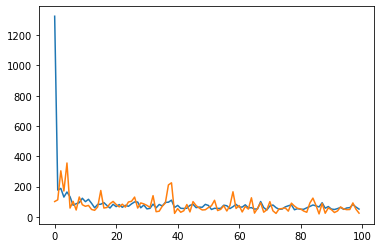

In [97]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

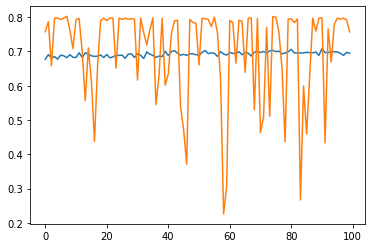

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])